<a href="https://colab.research.google.com/github/williamokomba/Dsc_week-4-IP/blob/main/Moringa_Data_science_Week_4_Independent_Project_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moringa Data science week 4 Independent project: William**



###1. Defining the Question



Dataset provided


1.   Autolib car-sharing  Dataset [Dataset link](http://bit.ly/DSCoreAutolibDataset)
2.   The glossary for the given dataset [link](http://bit.ly/DSCoreAutolibDatasetGlossary)



###a) Specifying the data analytic question
*   predict the region with the highest number of blue cars taken/hired.








###b) Defining the metric for success



 *   finding which demographic characteristics influence an individual to take a blue car from a certain region.




###c) Understanding the context
*  There are various factors that influence a person to hire/take a car from a cetrain region or during a certain day of the week. To solve our research problem we will use dataset that has demographic records from various regions and different days of the week.




###d) Recording the experimental design
*   To implement the solution we will first perform data reduction to reduce our many features then do Linear discriminant to predict which region has more blue cars being taken.






###e) Data Relevance
*   It is relevant since is data from various regions(post codes) and different days of the week.




##Import Libruaries

In [ ]:
# Importing standard libraries
import pandas as pd               # library for data manipulation and analysis
import numpy as np                # library for performin scientific computations
import matplotlib.pyplot as plt   # library for creating basic visualisations
import seaborn as sns             # library for creating rich data visualisatio

## loading and Reading Data

In [ ]:
# Importing Dataset for the given URL
#
# reading our dataset from a URL and storing contents in a dataframe (tabular datastructure)
#
autolib_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
#


## Performing Data Exploration

In [ ]:
# Previewing the top of our dataset
#
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#4d. Previewing the bottom of our dataset
# 
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


previewing top and bottom of our dataset make us to ensure the format is the same from top to the bottom.

In [ ]:
# determining the shape of the dataset / by shape we mean size
#
autolib_df.shape

(16085, 13)

**Observation:** Our dataset contains 16085 records, 13 variables.

In [ ]:
# generating a statistical summary of numerical variables
#
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


**Observation:** We can see that we not have any missing values since all variables have the same no. of count.

In [ ]:
# checking the data types: Object = string, int64 = integers
#
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

**Observation** the dataset has integers and object data type.

In [ ]:
# getting the unique values of each variable
#
cols = autolib_df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", autolib_df[col].nunique())
    print(autolib_df[col].unique())
    print()

Variable: Postal code
Number of unique values: 104
[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]

Variable: date
Number of unique values: 156
['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018'

**Observation:** This gives us a sense of which unique values exists within our 
variables. We can see that there is is no nan unique value. This is a hint that we don't missing values.

## Data Cleaning

In [ ]:
# check for duplicated values
#
autolib_df.duplicated().any()

False

There are no duplicated values so there's no need to drop any.

In [ ]:
# check for missing values
autolib_df.isna().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values so there's no need to drop any.

In [ ]:
# confirm that we don't have any more missing values
autolib_df.isna().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

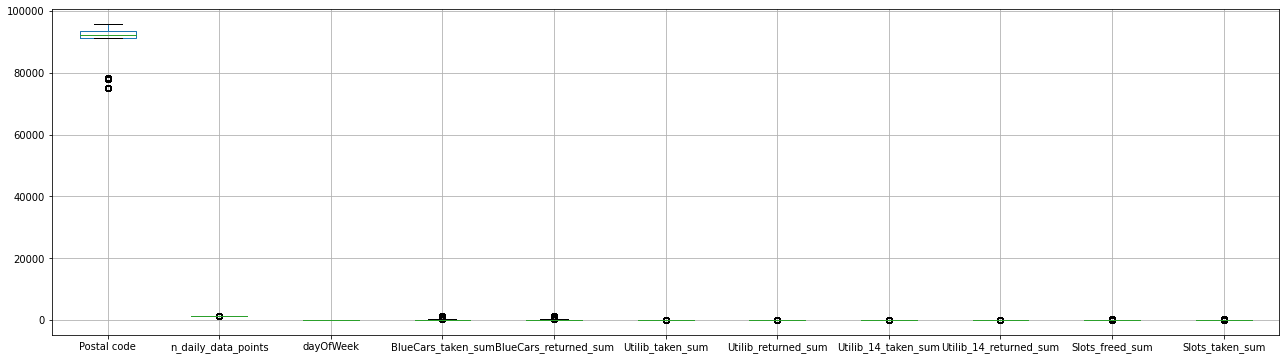

In [ ]:
# checking for outliers
plt.figure(figsize = (22, 6))
autolib_df.boxplot()
plt.show()

**Observation**: We see that postal code variable has outliers. However, this is categorical variable thus there is no need to remove it becauseit won't affect the analysis.

In [ ]:
#dropping unnessery colunms
autolib_df1 = autolib_df
autolib_df1.drop(columns=["BlueCars_returned_sum","Utilib_returned_sum","Utilib_taken_sum","Utilib_14_taken_sum","Utilib_14_returned_sum"],axis=1, inplace=True)
autolib_df1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,22,20
1,75001,1/2/2018,1438,1,weekday,98,23,22
2,75001,1/3/2018,1439,2,weekday,138,27,27
3,75001,1/4/2018,1320,3,weekday,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,18,20


**Observation**; we dropped the colunms since they will not be used on our analysis. our target varaible is bluecars taken sum.

In [ ]:
# standardizing variable names for readability
autolib_df1.columns = autolib_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib_df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

**Observation**: this ensure the variables have standard format. this helps in data analysis.

## Exploratory Data Analysis

### Univeriate Analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

In [ ]:
#Analysis of bluecars_taken_sum.
#
#The following code finds the mean of bluecars_taken_sum.
autolib_df1['bluecars_taken_sum'].mean()
#
print('mean :', autolib_df1['bluecars_taken_sum'].mean())

mean : 125.92695057506994


In [ ]:
#The following code finds the median of 'bluecars_taken_sum.
autolib_df1['bluecars_taken_sum'].median()
#
print('median ;', autolib_df1['bluecars_taken_sum'].median())

median ; 46.0


In [ ]:
#The following code finds the mode of 'bluecars_taken_sum.
autolib_df1['bluecars_taken_sum'].mode()
#
print('mode :',autolib_df1['bluecars_taken_sum'].mode())

mode : 0    12
dtype: int64


In [ ]:
#The following codes measure dispersion in the bluecars_taken_sum column
#
#The code below find the range in the bluecars_taken_sum
#
bluecar_max = autolib_df1['bluecars_taken_sum'].max()
bluecar_min = autolib_df1['bluecars_taken_sum'].min()
#
print("range :",bluecar_max-bluecar_min )

range : 1352


In [ ]:
#The code below calculates the skewness of the bluecars_taken_sum
#
autolib_df1['bluecars_taken_sum'].skew()

2.4063548974959086

**Oservation** the output shows a positive value hence the bluecars_taken_sum column is positively skewed[link text](https://)

In [ ]:
#The code below calculates the kurtosis of bluecars_taken_sum
#
autolib_df1['bluecars_taken_sum'].kurt()


6.172692305510042

**observation** kurtis is greater than zero, this leptokurtic as tail of distribution is heavy. there is outliers.

In [ ]:
#The following code finds the std of 'bluecars_taken_sum.
autolib_df1['bluecars_taken_sum'].std()
#
print('std :',autolib_df1['bluecars_taken_sum'].std())

std : 185.42657876727893


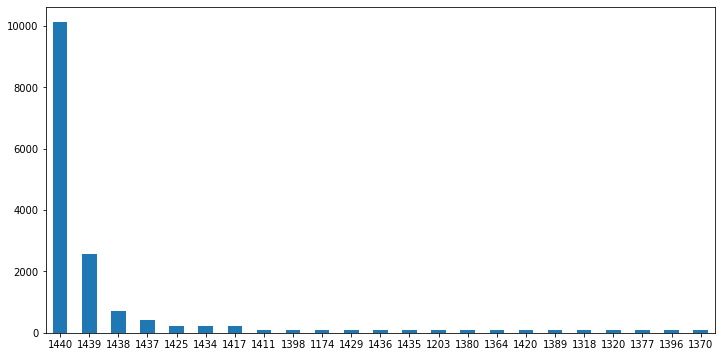

In [ ]:

# distribution of n_daily_data_points
#
plt.figure(figsize = (12, 6))
autolib_df1.n_daily_data_points.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**Observation** 1440 data points were higher compared to others. and the varaible is skewed to the right

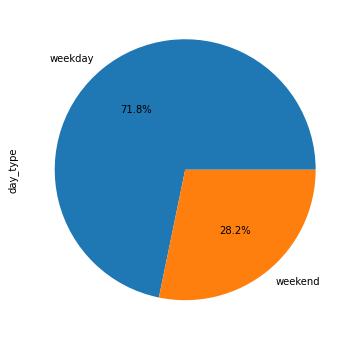

In [ ]:
# univariate analysis: day_type variable
plt.figure(figsize = (6, 6))
autolib_df1.day_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()


**Observation:** There are more weekday records in our dataset than weekend records. 

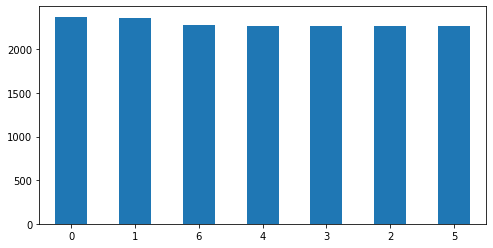

In [ ]:
# exploring the 'day of the week' variable
#
plt.figure(figsize = (8, 4))
autolib_df1.dayofweek.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**Observation** Majority of the cars were hired  on day 0(monday)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


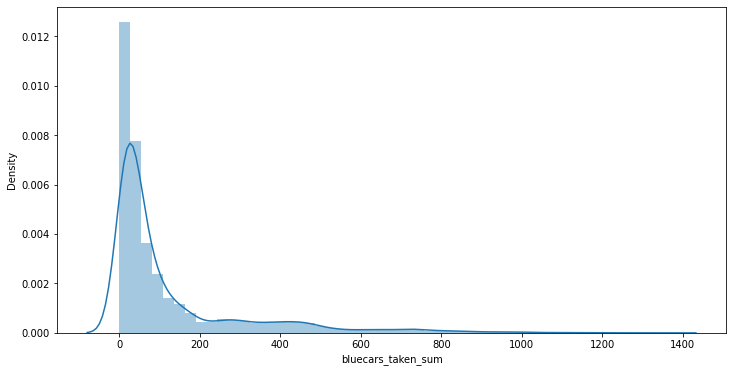

In [ ]:
# exploring the 'bluecars_taken_sum, variable
plt.figure(figsize = (12, 6))
sns.distplot(autolib_df1.bluecars_taken_sum);

**Observation:** The 'BlueCars_taken_sum' variable is skewed to the right.

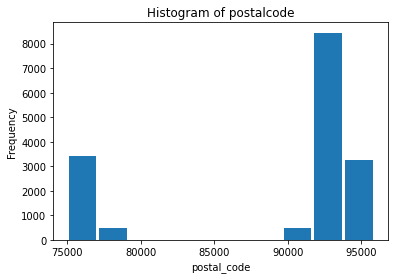

In [ ]:
# univariate analysis: slots_freed_sum variable
#

#The following code plots a histogram of postal_code
postal = autolib_df1['postal_code']
plt.hist(postal, bins=10, histtype='bar', rwidth=0.9)
plt.title('Histogram of postalcode')
plt.xlabel('postal_code') 
plt.ylabel('Frequency')
plt.show()


In [ ]:
#The following code shows the frequency table of days of the week .
#
frequency_df = autolib_df1['dayofweek']
frequency_df.value_counts().sort_values(ascending=False)

0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: dayofweek, dtype: int64

**Observation** The output shows 2374 blue cars taken on Monday, 2363 on Tuesday, 2268 on Wednesday, 2268 on Thursday and so on

In [ ]:
#The following code shows the frequency table of postal code .
#
frequency_df = autolib_df1['postal_code']
frequency_df.value_counts().sort_values(ascending=False)

92000    156
92500    156
75004    156
75012    156
75020    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [ ]:
#The following code shows the frequency table of day type
#
frequency_df1 = autolib_df1['day_type']
frequency_df1.value_counts().sort_values(ascending=False)

weekday    11544
weekend     4541
Name: day_type, dtype: int64

**Observation**; more blue cars were hired on weekdays compared to weekend

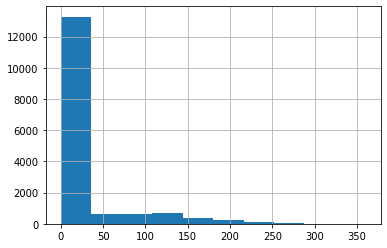

In [ ]:
# the following code shows the histogram of the slots_freed_sum variable
autolib_df1.slots_freed_sum.hist()
plt.show()

**Observation** The slots_freed_sum variable is strongly skewed to the right.

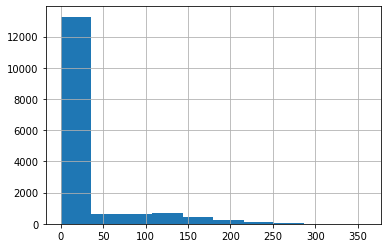

In [ ]:
# the following code shows the histogram of the slots_freed_sum variable
autolib_df1.slots_taken_sum.hist()
plt.show()

**Observation** The slots_taken_sum variable is strongly skewed to the right

> Indented block



In [ ]:
#dataset summary
autolib_df1.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,360.000000,359.000000


## Bivariate Analysis

We will now perform bivariate analysis. This is a type of analysis done on two variable. This type of analysis will be helpful in understanding the relationship between varables.

We will investigate how the target variable relates to the other variables.

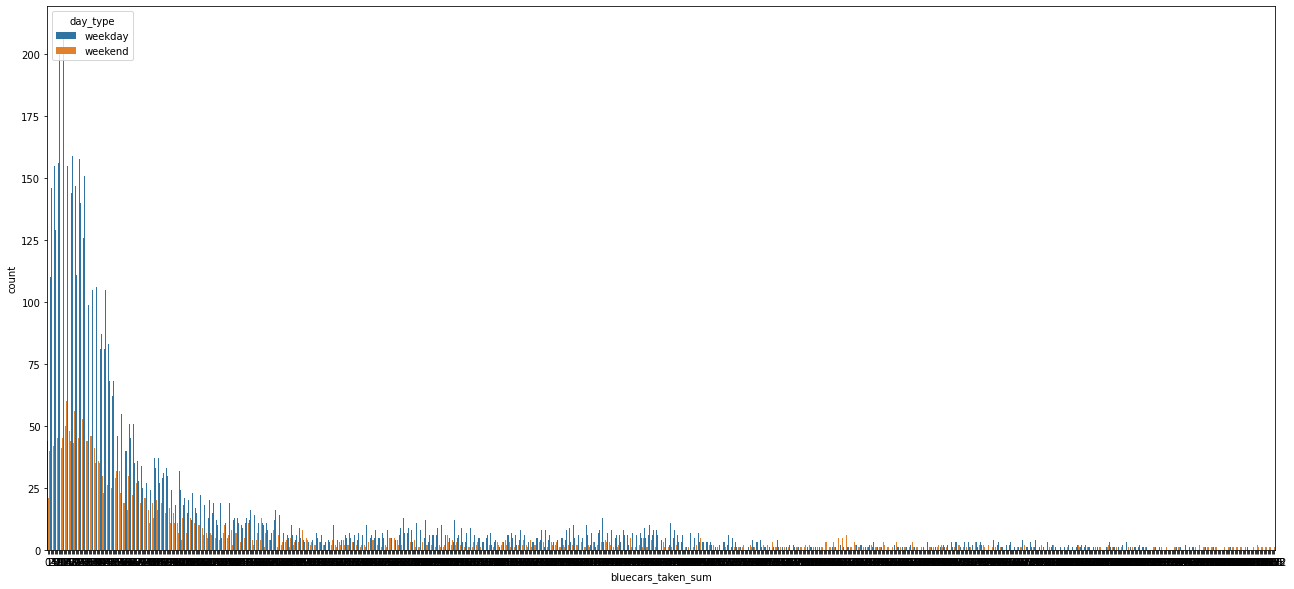

In [ ]:
# blue care taken  by day type
plt.figure(figsize = (22, 10))
sns.countplot(x = 'bluecars_taken_sum', hue = 'day_type', data = autolib_df1)
plt.show()

**Observation** weekday reported higher instance of blue car taken than weekend.

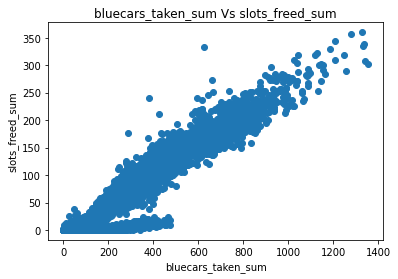

In [ ]:
# blue care taken  by slots_freed_sum
# Plotting our scatterplot
plt.scatter(autolib_df1['bluecars_taken_sum'], autolib_df1['slots_freed_sum'])

# Giving our scatterplot a title
plt.title('bluecars_taken_sum Vs slots_freed_sum')

# Labelling our x axis
plt.xlabel('bluecars_taken_sum')

# Labelling our y axis
plt.ylabel('slots_freed_sum')

# Displaying our scatterplot
plt.show()

**Observation** The scatterplot graph shows that the  bluecars_taken_sum variable is strongly correlated to the slots_freed_sum variable .

This is because as the bluecars_taken_sum, the slots_freed_sum also increases.

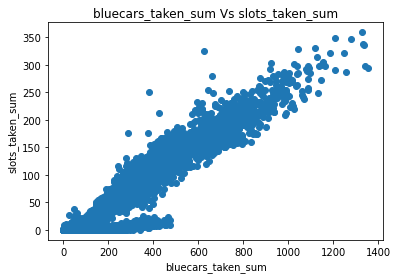

In [ ]:
# blue care taken  by slots_taken_sum
# Plotting our scatterplot
plt.scatter(autolib_df1['bluecars_taken_sum'], autolib_df1['slots_taken_sum'])

# Giving our scatterplot a title
plt.title('bluecars_taken_sum Vs slots_taken_sum')

# Labelling our x axis
plt.xlabel('bluecars_taken_sum')

# Labelling our y axis
plt.ylabel('slots_taken_sum')

# Displaying our scatterplot
plt.show()

**Observation** The scatterplot graph shows that the bluecars_taken_sum variable is strongly correlated to the slots_taken_sum variable .

This is because as the bluecars_taken_sum, the slots_taken_sum also increases

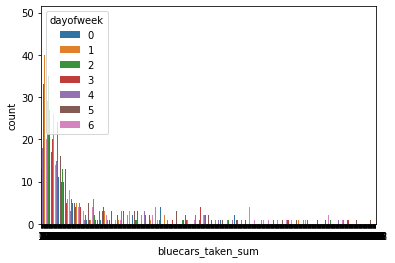

In [ ]:
# default_flg by good_work_flg
sns.countplot(x = 'bluecars_taken_sum', hue = 'dayofweek', data = autolib_df1)
plt.show()

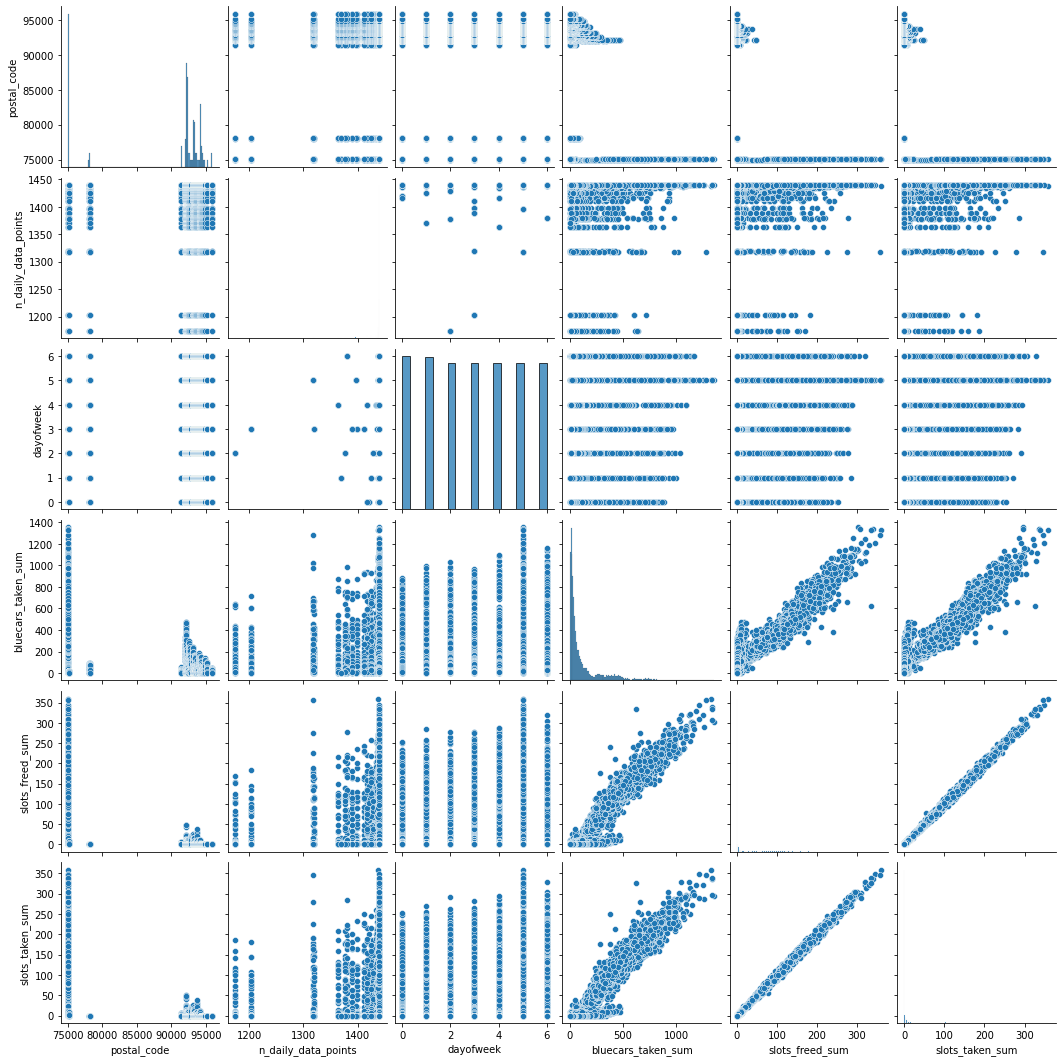

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_df1)
plt.show()

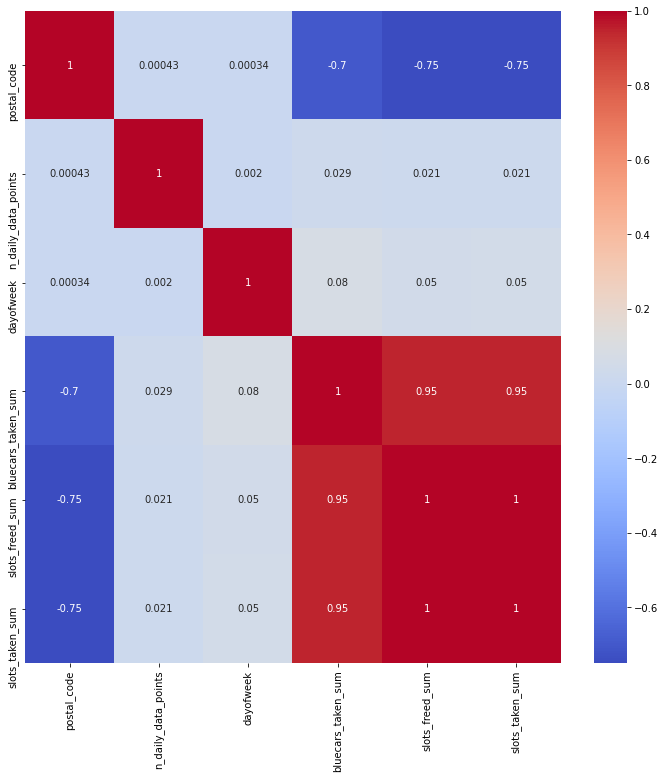

In [ ]:
# create a heatmap of the correlations of the variables in the dataset
#
plt.figure(figsize = (12, 12))
sns.heatmap(autolib_df1.corr(), cmap = 'coolwarm', annot = True)
plt.show()

**Observation** 

* we can see  bluecars_taken_sum variable and slots_freed_sum variable are highly correlated with each other.
* bluecars_taken_sum variable and slots_taken_sum variable are highly correlated with each other as well.
*bluecars_taken_sum variable and postal code variable are inversely correlated with each other


In [ ]:
autolib_df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

## Multivariate Analysis

In [ ]:
autolib_df1.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,22,20
1,75001,1/2/2018,1438,1,weekday,98,23,22
2,75001,1/3/2018,1439,2,weekday,138,27,27
3,75001,1/4/2018,1320,3,weekday,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,18,20


In [ ]:
autolib_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   postal_code          16085 non-null  int64 
 1   date                 16085 non-null  object
 2   n_daily_data_points  16085 non-null  int64 
 3   dayofweek            16085 non-null  int64 
 4   day_type             16085 non-null  object
 5   bluecars_taken_sum   16085 non-null  int64 
 6   slots_freed_sum      16085 non-null  int64 
 7   slots_taken_sum      16085 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1005.4+ KB


The following codes label encodes the various columns to convert them from objects to integers

In [ ]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
#
lb=LabelEncoder()
autolib_df1['dayofweek']=lb.fit_transform(autolib_df1['dayofweek'])
#
autolib_df1['day_type']=lb.fit_transform(autolib_df1['day_type'])


In [ ]:
#confirm our columns have been encoded.
#
autolib_df1.dtypes

postal_code             int64
date                   object
n_daily_data_points     int64
dayofweek               int64
day_type                int64
bluecars_taken_sum      int64
slots_freed_sum         int64
slots_taken_sum         int64
dtype: object

In [ ]:
 #: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#
# Separating our target label (bluecars_taken_sum) from the other features
#
feat= autolib_df1.drop(['bluecars_taken_sum','postal_code', 'date'], 1)
autolib_label = autolib_df1['bluecars_taken_sum']
#
# Subject our features to LDA model
# Import Linear Discriminant Analysis method from sklearn library
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda_= lda.fit(feat, autolib_label)
lda_feat = lda_.transform(feat)
#
# Display the coeficients of the reducted columns
lda_.coef_
#
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
day_type,0.624517
slots_taken_sum,0.006240
n_daily_data_points,-0.013443
slots_freed_sum,-0.147819
dayofweek,-0.183509


**Observation**: day time variable has the highest variation. 

##Implementing the solution

### Hypothesis testing

1.   null hypothesis(H0): The number of blue car taken in postal code 75015 is equal to the number of blue cars taken in postal code 75017
2.   alternative hypothesis(H1): The number of blue car taken in postal code 75015 is not equal to the number of blue cars taken in postal code 75017



In [ ]:
#Previewing our data set
#
autolib_df1.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,0,110,22,20
1,75001,1/2/2018,1438,1,0,98,23,22
2,75001,1/3/2018,1439,2,0,138,27,27
3,75001,1/4/2018,1320,3,0,104,25,21
4,75001,1/5/2018,1440,4,0,114,18,20


In [ ]:
#1a. getting our sample
#
# Cars taken from postal code 75015 and 75017
#
df1_15n17=autolib_df1[(autolib_df['postal_code']==75015) | (autolib_df1['postal_code']==75017)]
#
df1_15n17. head()


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,slots_freed_sum,slots_taken_sum
2184,75015,1/1/2018,1440,0,0,781,202,215
2185,75015,1/2/2018,1438,1,0,710,191,193
2186,75015,1/3/2018,1439,2,0,739,194,201
2187,75015,1/4/2018,1320,3,0,669,165,158
2188,75015,1/5/2018,1440,4,0,852,196,198


In [ ]:
#confirming only postal code 75015 and 75017 were selected.
df1_15n17.postal_code.unique()

array([75015, 75017])

In [ ]:
#checking sample dataset shape
df1_15n17.shape

(312, 8)

**Observation** the sample dataset has 312 records and 8 variables

In [ ]:
#summary of the blue cars taken in postal code 17015 and 17017
df1_15n17["bluecars_taken_sum"].describe()


count     312.000000
mean      815.724359
std       180.166182
min        38.000000
25%       713.000000
50%       783.500000
75%       920.750000
max      1352.000000
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# Cars taken from postal code for other regions
df1_others =autolib_df1[(autolib_df1['postal_code']!=75015) & (autolib_df1['postal_code']!=75017)]
#
df1_others["postal_code"].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75016, 75018, 75019, 75020,
       75112, 75116, 78000, 78140, 78150, 91330, 91370, 91400, 92000,
       92100, 92110, 92120, 92130, 92140, 92150, 92160, 92170, 92190,
       92200, 92210, 92220, 92230, 92240, 92250, 92260, 92270, 92290,
       92300, 92310, 92320, 92330, 92340, 92350, 92360, 92370, 92380,
       92390, 92400, 92410, 92420, 92500, 92600, 92700, 92800, 93100,
       93110, 93130, 93150, 93170, 93200, 93230, 93260, 93300, 93310,
       93350, 93360, 93370, 93390, 93400, 93440, 93500, 93600, 93700,
       93800, 94000, 94100, 94110, 94120, 94130, 94140, 94150, 94160,
       94220, 94230, 94300, 94340, 94410, 94450, 94500, 94700, 94800,
       95100, 95870, 95880])

In [ ]:
df1_others.shape

(15773, 8)

In [ ]:
#summary of the blue cars taken in postal code
#
df1_others["bluecars_taken_sum"].describe()

count    15773.000000
mean       112.282318
std        157.557295
min          0.000000
25%         19.000000
50%         45.000000
75%        123.000000
max       1088.000000
Name: bluecars_taken_sum, dtype: float64

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sm.stats.ztest(df1_15n17['bluecars_taken_sum'],df1_others['bluecars_taken_sum'], alternative='two-sided')

(77.86207924470128, 0.0)

**Observation** Z = 77.8 and the p value =0.01
the alpha(a) is 0.025, we reject the null hypothesis since p<a

## Challenging your Solution



1. Did we have the right question?

   Yes

2. Did we have the right data?

   Yes.

3.  What can be done to improve the solution?

  using other feature engineering techniques i.e PCA.